              Date    High     Low    Open   Close       Volume    Adj Close  \
Date                                                                           
2004-09-28  731852   835.0   825.0   835.0   825.0   90095000.0   121.710648   
2004-09-29  731853   825.0   810.0   825.0   825.0   29370000.0   121.710648   
2004-09-30  731854   830.0   825.0   825.0   830.0   42927500.0   122.448280   
2004-10-01  731855   845.0   825.0   830.0   840.0  108387500.0   123.923569   
2004-10-04  731858   880.0   845.0   845.0   870.0  424210000.0   128.349411   
2004-10-05  731859   880.0   870.0   870.0   880.0  124827500.0   129.824692   
2004-10-06  731860   880.0   855.0   880.0   860.0  121337500.0   126.874138   
2004-10-07  731861   860.0   850.0   860.0   855.0  122927500.0   126.136505   
2004-10-08  731862   860.0   845.0   850.0   855.0  106670000.0   126.136505   
2004-10-11  731865   870.0   855.0   855.0   870.0   93287500.0   128.349411   
2004-10-12  731866   870.0   845.0   870

c:\users\raka\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\raka\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


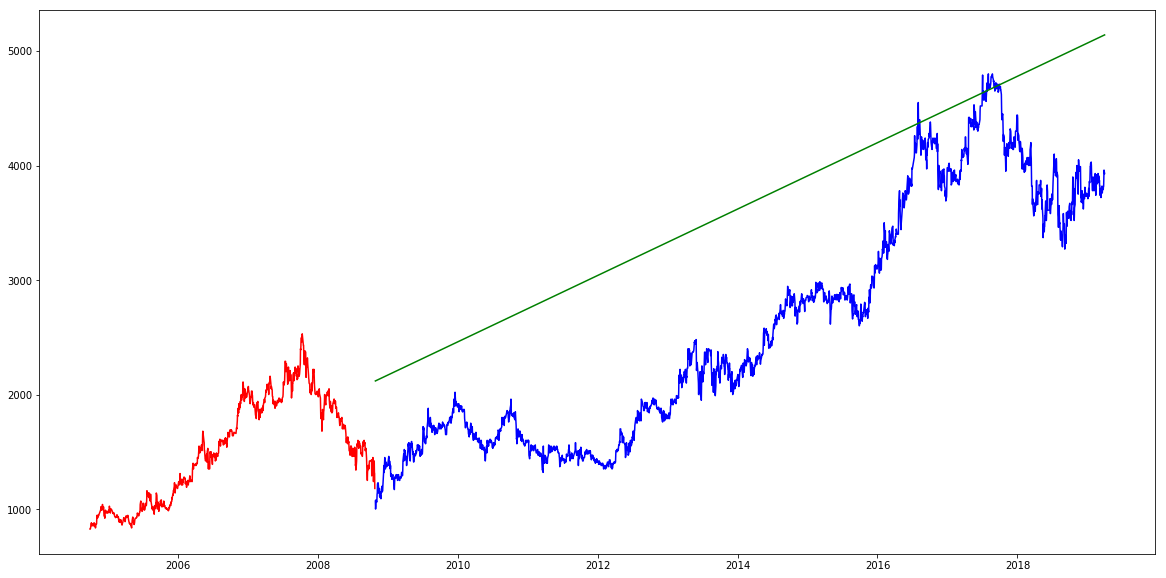

In [3]:
import pandas_datareader as pdr
from datetime import datetime
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

startyear = 2000
startmonth = 1
startdate = 1
endyear = 2019
endmonth = 10
enddate = 13
symbols = "tlkm"

import datetime as dt

datastocks = pdr.get_data_yahoo(symbols+".JK", start=datetime(startyear, startmonth, startdate), end=datetime(endyear, endmonth, enddate))
datastockss = pd.DataFrame(datastocks)
datastockss.reset_index(level=['Date'],inplace=True)

#setting index as date values
datastockss['Date'] = pd.to_datetime(datastockss.Date,format='%Y-%m-%d')
datastockss.index = datastockss['Date']
datastockss['Datecadangan'] = datastockss['Date']
datastockss['Date'] = datastockss['Date'].map(dt.datetime.toordinal)
print(datastockss)

# print(datastockss['Date'])

#sorting
data = datastockss.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(datastockss)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

# new_data['mon_fri'] = 0
# for i in range(0,len(new_data)):
#     if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
#         new_data['mon_fri'][i] = 1
#     else:
#         new_data['mon_fri'][i] = 0

#split into train and validation
train = new_data[:987]
valid = new_data[987:]
print(new_data)
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

# from sklearn.model_selection import train_test_split
# x_train, x_tes, y_train, y_tes = train_test_split(
#     new_data.drop('Close', axis=1),
#     new_data['Close'],
#     test_size = .2
# )

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# x_train = str(x_train)
# print(x_train.reshape(-1,1))
# print(y_train)
model.fit(x_train, y_train)

#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print(rms)

#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
new_data.index = datastockss['Datecadangan']
valid.index = new_data[987:].index
train.index = new_data[:987].index

print(new_data)

plt.plot(train['Close'],color='r')
# plt.plot(valid[['Close', 'Predictions']])
plt.plot(valid['Close'],color='b')
plt.plot(valid['Predictions'],color='g')
# plt.show()
# print(train['Close'])
# print(datastockss.index.values)
waktu = datastockss.index.year.values
# print(waktu)
# plt.xticks(valid[['Close', 'Predictions']],waktu,rotation = 90)
# plt.xticks(train['Close'].index.values,waktu[:987],rotation = 90)
# plt.xticks(valid['Close'].index.values,waktu[987:],rotation = 90)
# print(train['Close'])
# print(valid['Close'])
# print(train['Close'])
# print(datastockss)
plt.show()

In [4]:
import pickle
filename = 'linreg.sav';
pickle.dump(model, open(filename, 'wb'))